### Loading and selecting data

In [26]:
library(readr)
library(tidyverse)

In [27]:
gss <- read_csv('C:/data/welfarenolabel3.csv', na=c('.i', 'dk', 'na', -999))

Parsed with column specification:
cols(
  .default = col_double(),
  occ80 = col_logical(),
  prestg80 = col_logical(),
  indus80 = col_logical(),
  widowed = col_logical(),
  spocc80 = col_logical(),
  sppres80 = col_logical(),
  spind80 = col_logical(),
  agekdbrn = col_logical(),
  mawkborn = col_logical(),
  `_mergescore` = col_character()
)

See spec(...) for full column specifications.

Warning message:
"181752 parsing failures.
 row      col           expected actual                          file
1471 mawkborn 1/0/T/F/TRUE/FALSE      2 'C:/data/welfarenolabel3.csv'
1472 mawkborn 1/0/T/F/TRUE/FALSE      2 'C:/data/welfarenolabel3.csv'
1475 widowed  1/0/T/F/TRUE/FALSE      2 'C:/data/welfarenolabel3.csv'
1475 mawkborn 1/0/T/F/TRUE/FALSE      2 'C:/data/welfarenolabel3.csv'
1477 mawkborn 1/0/T/F/TRUE/FALSE      2 'C:/data/welfarenolabel3.csv'
.... ........ .................. ...... .............................
See problems(...) for more details.
"


In [28]:
glimpse(gss)

Observations: 36,501
Variables: 211
$ year          <dbl> 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,...
$ id            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ wrkstat       <dbl> 1, 7, 1, 5, 2, 7, 7, 1, 1, 2, 1, 7, 1, 7, 7, 8, 1, 7,...
$ hrs1          <dbl> 40, NA, 40, NA, NA, NA, NA, 40, 40, 5, 45, NA, 40, NA...
$ hrs2          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ evwork        <dbl> NA, 1, NA, 1, NA, 1, 2, NA, NA, NA, NA, 1, NA, 1, 1, ...
$ occ           <dbl> 270, 195, 184, 311, NA, 902, NA, 123, 184, 185, 372, ...
$ prestige      <dbl> 44, 51, 51, 36, NA, 12, NA, 78, 51, 46, 46, 41, 36, 2...
$ wrkslf        <dbl> 2, 2, 2, 2, 2, 2, NA, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, N...
$ wrkgovt       <dbl> 2, 2, 2, 1, NA, 1, NA, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
$ commute       <dbl> 60, 10, 35, 25, 25, 10, NA, 30, 55, 15, 60, 40, 45, 3...
$ occ80         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ prestg80      

In [29]:
gss <- gss %>% select(c('year', 'w', 'y', 'partyid', 'polviews', 'age', 'educ'))
gss <- gss %>% rename(treatment=w, response=y)
glimpse(gss)

Observations: 36,501
Variables: 7
$ year      <dbl> 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 198...
$ treatment <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...
$ response  <dbl> 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...
$ partyid   <dbl> 3, 6, 0, 0, 0, 1, 5, 1, 1, 4, 1, 2, 0, 0, 1, 1, 1, 1, 1, ...
$ polviews  <dbl> 4.000000, 6.000000, 2.000000, 4.000000, 4.000000, 1.00000...
$ age       <dbl> 28, 54, 44, 77, 44, 47, 19, 36, 27, 51, 24, 37, 25, 36, 6...
$ educ      <dbl> 14, 16, 16, 14, 14, 10, 10, 18, 17, 18, 12, 12, 11, 6, 8,...


### Average Treatment Effect

In [30]:
# Average treatment effect by using dplyr
gss %>%
    group_by(treatment) %>%
    summarize(avg=mean(response)) %>%
    summarize(ate=avg[treatment==1]-avg[treatment==0])

ate
<dbl>
-0.3379543


In [31]:
# Average treatment effect by usign lm
summary(lm(response~treatment, data=gss))


Call:
lm(formula = response ~ treatment, data = gss)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42920 -0.42920 -0.09125 -0.09125  0.90875 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.429200   0.003050  140.71   <2e-16 ***
treatment   -0.337954   0.004178  -80.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3983 on 36499 degrees of freedom
Multiple R-squared:  0.152,	Adjusted R-squared:  0.152 
F-statistic:  6542 on 1 and 36499 DF,  p-value: < 2.2e-16


### Heterogeneous Treatment Effects

In [32]:
library(randomForest)

In [33]:
gss <- gss %>% drop_na()
glimpse(gss)

Observations: 33,279
Variables: 7
$ year      <dbl> 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 198...
$ treatment <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...
$ response  <dbl> 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...
$ partyid   <dbl> 3, 6, 0, 0, 0, 1, 5, 1, 1, 4, 1, 2, 0, 0, 1, 1, 1, 1, 1, ...
$ polviews  <dbl> 4.000000, 6.000000, 2.000000, 4.000000, 4.000000, 1.00000...
$ age       <dbl> 28, 54, 44, 77, 44, 47, 19, 36, 27, 51, 24, 37, 25, 36, 6...
$ educ      <dbl> 14, 16, 16, 14, 14, 10, 10, 18, 17, 18, 12, 12, 11, 6, 8,...


In [34]:
m0 <- randomForest(response ~ . -treatment, data=filter(gss, treatment==0))

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


In [35]:
m1 <- randomForest(response ~ . -treatment, data=filter(gss, treatment==1))

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


In [36]:
y_0 <- predict(m0, gss, type='response')
y_1 <- predict(m1, gss, type='respo')

In [37]:
cate <- y_1-y_0

In [38]:
summary(cate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6893 -0.4153 -0.3385 -0.3360 -0.2616  0.2240 

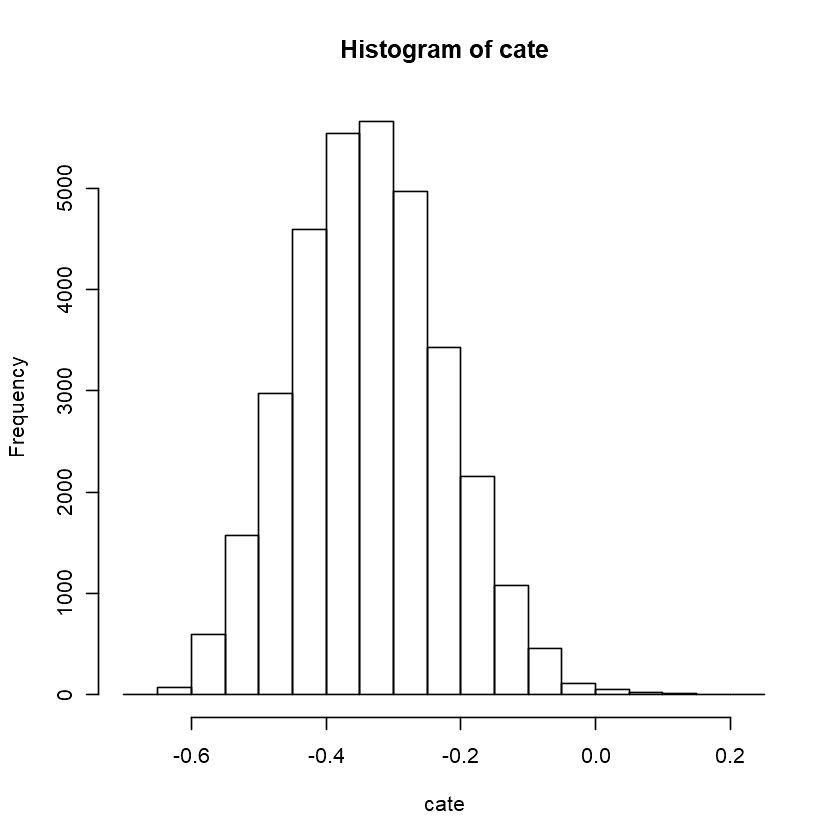

In [39]:
hist(cate)

### Generalized Random Forest (GRF)

In [40]:
library(grf)

In [41]:
x <- model.matrix(response ~ . -treatment, data=gss)
y <- gss$response
tmt <- gss$treatment

In [42]:
m <- causal_forest(x, y, tmt)

In [43]:
cate <- predict(m, estimate.variance=T)

In [44]:
summary(cate)

  predictions       variance.estimates  debiased.error      
 Min.   :-0.58776   Min.   :0.0001958   Min.   :-0.0000127  
 1st Qu.:-0.39561   1st Qu.:0.0012422   1st Qu.: 0.0055457  
 Median :-0.33033   Median :0.0020450   Median : 0.0604639  
 Mean   :-0.33320   Mean   :0.0023759   Mean   : 0.1500898  
 3rd Qu.:-0.27585   3rd Qu.:0.0031678   3rd Qu.: 0.2280817  
 Max.   :-0.06426   Max.   :0.0134164   Max.   : 1.1273204  
  excess.error      
 Min.   :8.848e-07  
 1st Qu.:8.430e-06  
 Median :1.871e-05  
 Mean   :1.921e-05  
 3rd Qu.:2.889e-05  
 Max.   :6.252e-05  

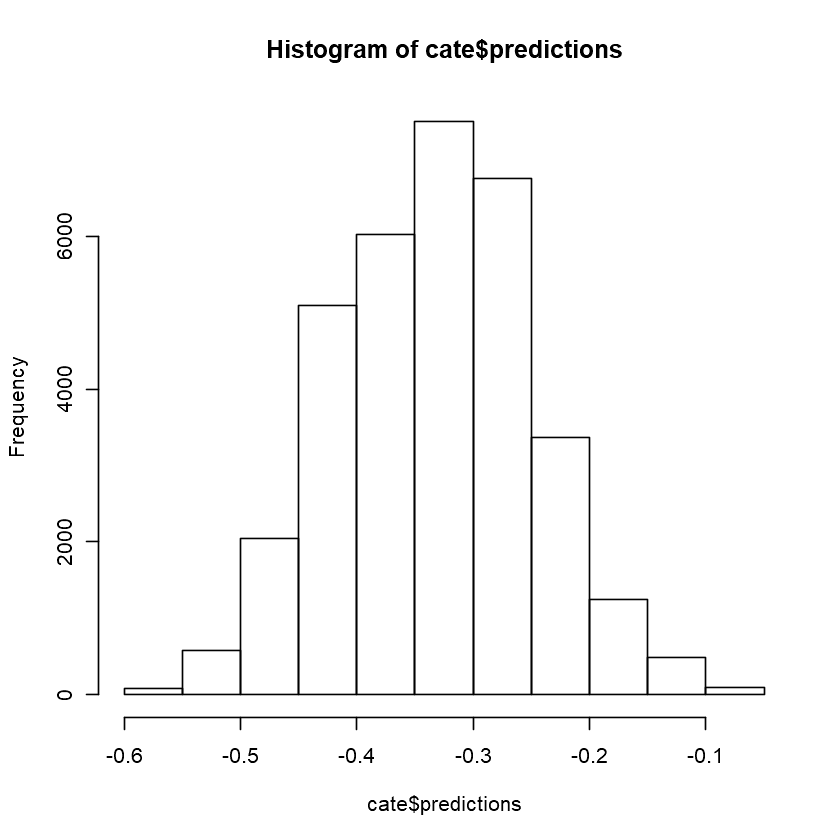

In [46]:
hist(cate$predictions)

### Interactive, split, and x-learner with hete

In [47]:
library(hete)
m <- hete_single(factor(response) ~ year + educ + age|treatment, data=gss, est=random_forest)

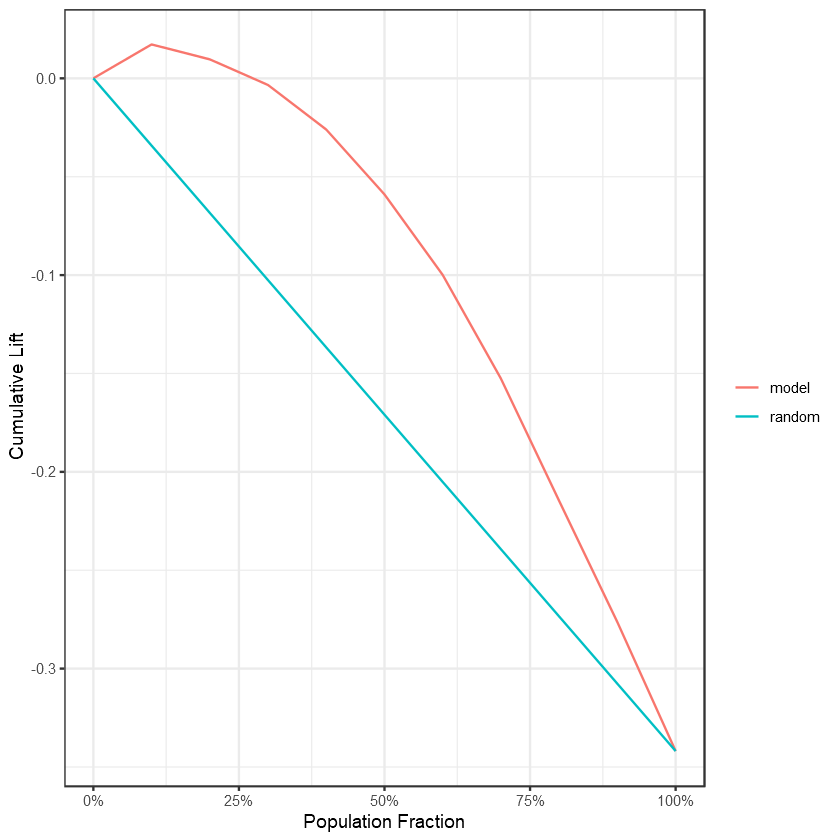

In [48]:
plot(m)

In [49]:
cate <- predict(m, gss)

In [50]:
summary(cate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9950 -0.4900 -0.2700 -0.3287 -0.1200  0.6050 

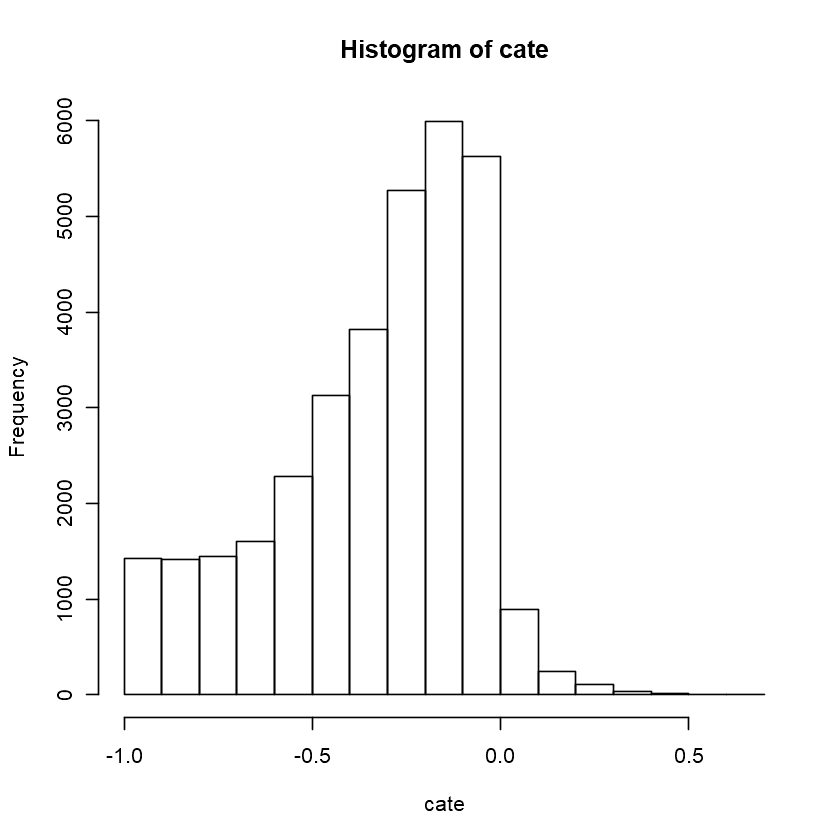

In [51]:
hist(cate)

So should we rebrand the term 'welfare'? Yes, we should as most of the heterogeneous groups response to the term 'assistance' more favarably than the term 'welfare' with the average treatment response of -33%